In [1]:
import nltk
import pymorphy2
import math
from matplotlib import pyplot as pp
import codecs

morph = pymorphy2.MorphAnalyzer()

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
text = codecs.open("/home/katty/anaconda3/_nlp/project_hp/corp/5.txt", "r", "utf-8").read() # у меня был на компьютер текст Гарри Поттера, пробовала на нем

In [4]:
normal_text = [morph.parse(word.lower())[0].normal_form for word in nltk.tokenize.word_tokenize(text) if word.isalpha()]
print(normal_text[:10])

['джоан', 'роулинга', 'гарри', 'поттер', 'и', 'орден', 'феникс', 'глава', 'дадли', 'достаться']


In [64]:
key_word = {"замок"}
docs = [" ".join(normal_text[i:i+11]) for i in range(len(normal_text)-11) if normal_text[i+5] in key_word]
print(docs)

['дверь гарри услышать как в замок поворачиваться ключ вслед за это', 'сила через мгновение громко щёлкнуть замок гарри аж подскочить и дверь', 'магически запирать за уйти многочисленный замок и засов ужинать быть на', 'закоптить дверь с огромный железный замок он тяжело привалиться к стена', 'карета который всегда возить в замок ученик начинать с второй курс', 'весь территория быть совершенно темно замок хогвартс между тем становиться всё', 'ведущий к дубовый входной дверь замок карета с лязг остановиться гарри', 'стебль гриффиндорец потянуться обратно в замок разговаривать мало позади быть ещё', 'который вести в левый крыло замок чжоу сказать я до встреча', 'через два они вернуться в замок на обед в ход который', 'с два сторона полететь к замок всё переодеваться слизеринец проводить они', 'амбридж отправиться по лужайка к замок гарри выйти из кабинет амбридж', 'дверь и повернуть торчать в замок ключ замок успокоительно щёлкнуть всё', 'повернуть торчать в замок ключ замок успокоительн

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [66]:

cv=CountVectorizer()
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(docs)

In [67]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [68]:
count_vector=cv.transform(docs)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [69]:
print(tf_idf_vector.shape)

(70, 374)


In [70]:
res = tf_idf_vector.toarray()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

res_scal = scaler.fit_transform(res)

print(res_scal)

[[-0.12038585 -0.12038585 -0.12038585 ... -0.12038585  3.7609079
  -0.12038585]
 [ 8.30662386 -0.12038585 -0.12038585 ... -0.12038585 -0.27728135
  -0.12038585]
 [-0.12038585 -0.12038585 -0.12038585 ... -0.12038585 -0.27728135
  -0.12038585]
 ...
 [-0.12038585 -0.12038585 -0.12038585 ... -0.12038585  3.58757303
  -0.12038585]
 [-0.12038585 -0.12038585 -0.12038585 ... -0.12038585 -0.27728135
   8.30662386]
 [-0.12038585 -0.12038585 -0.12038585 ... -0.12038585 -0.27728135
  -0.12038585]]


In [71]:
from sklearn.decomposition import PCA

pca = PCA(20)
c_20 = pca.fit_transform(res_scal)
print(c_20)

[[-1.09821833e+00 -1.32498949e+00 -3.10116203e+00 ... -2.93101826e-01
  -1.44726598e-01  9.24858161e-01]
 [-1.04320045e+00 -1.30279471e+00 -3.86732130e+00 ...  1.36682720e+00
  -5.86953572e-01  9.16013261e-02]
 [-8.70334756e-01 -9.99084620e-02  3.68953331e-01 ... -6.98962301e+00
  -2.33653924e+00 -9.55977427e-01]
 ...
 [-8.60926533e-01  5.26309333e-01 -1.68399757e+00 ... -3.47555808e-01
   9.42637530e-01 -2.33029493e+00]
 [ 1.02562629e+00 -2.47891048e-01 -2.35572740e-01 ...  3.20456640e-03
   1.63371533e+00 -1.26671291e+00]
 [-3.05050443e-01 -6.25609622e-01  4.08323490e+00 ... -5.14028507e-01
  -3.78389005e-01 -7.06772258e-01]]


In [72]:
from sklearn.cluster import KMeans

from sklearn.neighbors import LocalOutlierFactor

import numpy

loc = LocalOutlierFactor(n_neighbors=2, contamination=0.01)

preds = loc.fit_predict(c_20)

c_20_no_out = c_20[preds == 1, :]

kmeans = KMeans(2)

cluster = kmeans.fit_predict(c_20_no_out)

print(cluster.shape)
cls_1 = []
cls_2 = []



(69,)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['сила через мгновение громко щёлкнуть замок гарри аж подскочить и дверь', 'закоптить дверь с огромный железный замок он тяжело привалиться к стена', 'ведущий к дубовый входной дверь замок карета с лязг остановиться гарри', 'через два они вернуться в замок на обед в ход который', 'с два сторона полететь к замок всё переодеваться слизеринец проводить они', 'амбридж отправиться по лужайка к замок гарри выйти из кабинет амбридж', 'дверь и повернуть торчать в замок ключ замок успокоительно щёлкнуть всё']
['почему весь до единый обитатель замок стать известно что дамблдору удаться', 'близко подходить к грохха окрестность замок сиять на солнце безоблачный небо', 'идеальный тихий и безоблачный окрестность замок купаться в серебристый лунный свет', 'близко подходить к грохха окрестность замок сиять на солнце безоблачный небо', 'идеальный тихий и безоблачн

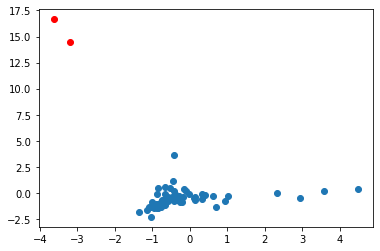

In [75]:
vis_scaler = StandardScaler()
vis_pca = PCA(2)
t_scales = vis_scaler.fit_transform(res)
t_2 = vis_pca.fit_transform(t_scales)
loc = LocalOutlierFactor(n_neighbors=1, contamination=0.01)

preds = loc.fit_predict(t_2)

t_2_no_out = t_2[preds == 1, :]


kmeans = KMeans(2)

cluster = kmeans.fit_predict(t_2_no_out)

print(cluster)
docs_clus = []
for i in range(len(preds)):
    if preds[i] == 1:
        docs_clus.append(docs[i])

for i in range(len(docs_clus)):
    if cluster[i] == 0:
        cls_1.append(docs_clus[i])
    else:
        cls_2.append(docs_clus[i])
t_first = t_2_no_out[cluster == 0, :]
t_second = t_2_no_out[cluster == 1, :]

pp.plot(t_first[:, 0], t_first[:, 1], 'o')
pp.plot(t_second[:, 0], t_second[:, 1], 'or')
#pp.xlim([-3, 3])
#pp.ylim([-3, 3])
print(cls_1[:7])
print(cls_2[:7])